<a href="https://colab.research.google.com/github/FawadAli1122/PIAIC-BATCH-35-Q2/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
import cv2
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip /content/gdrive/MyDrive/ColabNotebooks/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b

In [9]:
data_dir=pathlib.Path('/content/flowers')
print(data_dir)

/content/flowers


In [10]:
!ls

drive  flowers	gdrive	sample_data


In [5]:
%cd flowers

/content/flowers


In [ ]:
!ls

daisy  dandelion  flowers  rose  sunflower  tulip


In [6]:
!rm -rf flowers

In [7]:
!ls

daisy  dandelion  rose	sunflower  tulip


In [11]:
len(list(data_dir.glob('*/*.jpg')))

4323

In [12]:
rose=list(data_dir.glob('rose/*.jpg'))
rose[:5]

[PosixPath('/content/flowers/rose/18490508225_0fc630e963_n.jpg'),
 PosixPath('/content/flowers/rose/5487945052_bcb8e9fc8b_m.jpg'),
 PosixPath('/content/flowers/rose/14687731322_5613f76353.jpg'),
 PosixPath('/content/flowers/rose/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/content/flowers/rose/2949945463_366bc63079_n.jpg')]

In [13]:
flower_images={
    'rose' : list(data_dir.glob('rose/*.jpg')),
    'tulip': list(data_dir.glob('tulip/*.jpg')),
    'dandelin':list(data_dir.glob('dandelin/*.jpg')),
    'sunflower':list(data_dir.glob('sunflower/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg'))
}
flower_labels={
    'rose':0,
    'tulip':1,
    'dandelin':2,
    'sunflower':3,
    'daisy':4
}

In [14]:
x,y=[],[]
for names, images in flower_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels[names])

In [15]:
x=np.array(x)
y=np.array(y)

In [16]:
x=x/255 

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30,shuffle=True)

(2616, 180, 180, 3)


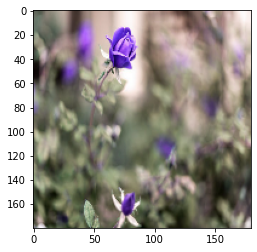

In [18]:
print(np.shape(x_train))
plt.imshow(x_train[0]) 
#x_train = np.array(x_train, dtype='float32')
#y_train = np.array(y_train,dtype='float32')

In [19]:
print(x_train.shape)
print(x_test.shape)
print(x_train.ndim)
print(y_train.ndim)
print(y_train.shape)
print(y_train)

(2616, 180, 180, 3)
(655, 180, 180, 3)
4
1
(2616,)
[0 4 3 ... 4 0 3]


In [20]:
network = keras.Sequential()

In [21]:
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Flatten()),
network.add(layers.Dense(5, activation='softmax'))

In [26]:
network.compile(optimizer = 'adam',
               loss = 'SparseCategoricalCrossentropy',
               metrics = ['accuracy'])

In [23]:
history=network.fit(x_train, y_train, epochs=5)

Epoch 1/5
82/82 [==============================] - 490s 6s/step - loss: 96.5099 - accuracy: 0.3944
Epoch 2/5
82/82 [==============================] - 456s 6s/step - loss: 1.4319 - accuracy: 0.6387
Epoch 3/5
82/82 [==============================] - 465s 6s/step - loss: 0.7714 - accuracy: 0.7402
Epoch 4/5
82/82 [==============================] - 468s 6s/step - loss: 0.5185 - accuracy: 0.8317
Epoch 5/5
82/82 [==============================] - 454s 6s/step - loss: 0.4327 - accuracy: 0.8545


In [25]:
network.evaluate(x_test,y_test)

21/21 [==============================] - 29s 1s/step - loss: 1.2985 - accuracy: 0.6198


[1.2984775304794312, 0.6198473572731018]

In [29]:
test_case = network.predict(x_test)

In [30]:
y_test_pred = np.argmax(test_case,axis = 1)

In [31]:
y_test_pred

array([3, 1, 4, 0, 1, 1, 1, 3, 1, 4, 4, 4, 4, 4, 3, 4, 1, 4, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 4, 3, 1, 4, 4, 3, 4, 4, 0, 0, 3, 1, 4, 3, 1, 1, 3,
       0, 0, 3, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 1, 3, 4, 3, 3, 1, 3, 4,
       4, 0, 0, 4, 3, 3, 1, 4, 4, 1, 1, 0, 0, 3, 4, 1, 1, 3, 1, 4, 3, 1,
       1, 3, 4, 4, 3, 1, 4, 4, 0, 0, 1, 3, 3, 4, 1, 4, 0, 1, 4, 4, 4, 4,
       4, 1, 4, 1, 1, 4, 4, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 4, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 0, 3, 1, 4, 4, 3, 4, 0, 1, 1,
       4, 3, 3, 3, 1, 1, 3, 3, 1, 4, 1, 3, 0, 3, 1, 1, 4, 4, 4, 3, 3, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 4, 1, 4, 1, 0, 3, 4,
       0, 1, 1, 3, 1, 1, 1, 4, 4, 1, 3, 4, 3, 4, 1, 1, 1, 4, 0, 1, 4, 1,
       1, 3, 3, 0, 1, 3, 1, 1, 1, 3, 1, 4, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 4, 4, 0, 4, 1, 1, 0, 1, 1, 1, 1, 3, 1, 4, 3, 4, 4, 0, 3, 1, 1,
       1, 4, 1, 4, 1, 1, 4, 3, 3, 4, 4, 0, 4, 3, 1, 3, 1, 1, 1, 1, 1, 4,
       0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 4, 3, 1,

In [36]:
for i in range(655):
    print("actual",y_test[i],"predicted",y_test_pred[i])

actual 3 predicted 3
actual 4 predicted 1
actual 4 predicted 4
actual 0 predicted 0
actual 1 predicted 1
actual 1 predicted 1
actual 1 predicted 1
actual 3 predicted 3
actual 0 predicted 1
actual 4 predicted 4
actual 4 predicted 4
actual 4 predicted 4
actual 4 predicted 4
actual 1 predicted 4
actual 4 predicted 3
actual 4 predicted 4
actual 1 predicted 1
actual 4 predicted 4
actual 3 predicted 3
actual 1 predicted 1
actual 1 predicted 3
actual 0 predicted 1
actual 0 predicted 1
actual 3 predicted 3
actual 0 predicted 1
actual 3 predicted 3
actual 1 predicted 1
actual 4 predicted 4
actual 3 predicted 3
actual 1 predicted 1
actual 4 predicted 4
actual 4 predicted 4
actual 3 predicted 3
actual 4 predicted 4
actual 3 predicted 4
actual 0 predicted 0
actual 1 predicted 0
actual 3 predicted 3
actual 3 predicted 1
actual 4 predicted 4
actual 4 predicted 3
actual 1 predicted 1
actual 1 predicted 1
actual 3 predicted 3
actual 0 predicted 0
actual 0 predicted 0
actual 0 predicted 3
actual 4 pred